## Introduction

E-Commerce has emerged to become one of the biggest industries with an amazing change from offline shopping to online shopping. This trend is seeing an exponential rise and more and more people prefer online shopping for factors
such as convenience and discounted.

Everyday many products popping into the online market daily customers depend highly on the customer reviews story of products on eCommerce sites to make decisions about their purchase. Since It will be tedious for the customer to make selection if they should check one by one of the product they needed. Here comes 'reviews' where customers who have already got that product leave a rating after using them and brief their experience by giving reviews. Based on the reviews given by the user; the products can be recommended to another user.

On the other side which is e-commerce, review and rating of product is also important. They can review their product such as quality, prices or seller service by customer reviewed comment and rating. Also ecommerce can learn behaviour or expression of their customer after sales. So ecommerce can raise customer trus and 

Businesse Solution
- Which product category have higher reviews ?
- which product give most revenue ?
- What is the characteristics customer review by ratings ?
- What is the top biwords characteristics reviews for postive ?
- What is the top triwords characteristics reviews for negative ?
- By using Sentiment analysis, can we predict sentiment reaction by reviews customer

## Dataset

This dataset is based on e-commerce data set men and woman shoes reviews seem to be the main focus here. Data set can be downloaded from [kaggle](https://www.kaggle.com/daishinkan002/men-women-shoes-reviews/code).

Column contains :
- Title, Price, average rating, Product Description, Shoe Type

- Rating - Total rating ( out of 5 ).

- Total Reviews - Number of reviews that mobile got on that Product

- Reviews - Contains up to 10 reviews of Shoe ( separated by '|| ')

- Reviews Rating - Contains up to 10 corresponding reviews rating of Mobile ( separated by '|| ')

# 2 Connect to Google drive 

In [203]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [204]:
%cd /content/gdrive/MyDrive/my collab/sentimen analysis

[Errno 2] No such file or directory: '/content/gdrive/MyDrive/my collab/sentimen analysis'
/content


# 3 Load Library

In [205]:
# import library for manipulating data
import numpy as np
import pandas as pd

# import library for visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

# To Data Cleaning
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import string
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textblob import TextBlob, Word, Blobber

# sklearn imports for modeling part
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,balanced_accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, accuracy_score
from sklearn.model_selection import train_test_split

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 4 Load Data

In [206]:
sd = pd.read_csv('Shoes_Data.csv')
sd.sample(3)

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
701,Adidas Men's Agora 1.0 Multisport Training Shoes,₹2692.00,3.9 out of 5 stars,2515 ratings,The lightweight adidas Agora shoes for men. Th...,Solid product for 1.8k|| Best in the industry ...,5.0 out of 5 stars|| 4.0 out of 5 stars|| 4.0 ...,Men
685,Puma Unisex's Tenaz Badminton Shoes,₹3948.00,4.2 out of 5 stars,286 ratings,Puma brings to you one of the most sought afte...,best buy|| Must buy|| Nice product 👌|| I hate ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 4.0 ...,Men
1124,Skechers Women Go Walk 4 Nordic Walking Shoes,₹4499.00,3.9 out of 5 stars,30 ratings,Upper: Strong yet lightweight textured Knitted...,Excellent|| Fit is too large and so is the com...,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Women


In [207]:
#checking data type and initial missing value
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1230 non-null   object
 1   price                1230 non-null   object
 2   rating               1230 non-null   object
 3   total_reviews        1230 non-null   object
 4   product_description  1230 non-null   object
 5   reviews              1230 non-null   object
 6   reviews_rating       1230 non-null   object
 7   Shoe Type            1230 non-null   object
dtypes: object(8)
memory usage: 77.0+ KB


In [208]:
#checking dimension data
sd.shape

(1230, 8)

sd.sample, we can observe detail :
1. column title contains of 
 - brand shoes such adidas, reebok, puma, etc,
 - categorical shoes such as sport shoes (running shoes), casual shoes (sneaker)
 column title will make it lower, expect to have most frequently word (bigger sizes of words represent the higher frequency of each word, and expecting to derive it as category shoes)
2. price contain price of each title. we are going to have descriptive info : knowing the distribution price and knowing the characteristic price of each categorical shoes
3. total review going to have desriptive info the distribution of total review
4. product descriptive contain the detail info of tittle (each product). we are going to have desriptive info : most frequently word
5. reviews and review rating contains the expression each buyer after buy by giving comment and score. we are going extra with sentiment analysis
6. shoes type : men and woman.

sd.info, we can observe detail :
1. count of non-null values for each column, there is no missing value if based on .info(). But we will recheck it with unique value for each column to be sure no missing value such as ike .., __, — , missing, na, @,??,***, etc
2. datatype info for each column, we will conver if needed for next analysis

sd.shape contains the dimension of our data, number rows and number column, 1230 rows and 8 columns


# 5 Data Cleaning

### missing value

In [209]:
# count for null values in each columns
sd.isnull().sum()

title                  0
price                  0
rating                 0
total_reviews          0
product_description    0
reviews                0
reviews_rating         0
Shoe Type              0
dtype: int64

In [210]:
#ensure the unique value for each coloumn to be sure missing value such as .., __, — , missing, na, @,??,***, etc
for column in sd.columns:
    print(f"============= {column} =================")
    display(sd[column].value_counts())
    print()

============= title =================


Flavia Women Running Shoes                                                             13
Flavia Women's Running Shoes                                                           10
Sparx Men's Running Shoes                                                               8
Adidas Men Running Shoes                                                                8
Clarks Men's Formal Shoes                                                               8
                                                                                       ..
Mens Joyride Running Shoes Sports Shoes Tracking Shoes Running Shoes (White Colour)     1
Hush Puppies Men Tyler Formal Shoes                                                     1
Red Tape mens Outdoor Boots                                                             1
US Polo Association Men's Panal Sneakers                                                1
ASICS Men's Gel-Contend 5b Running Shoes                                                1
Name: titl


============= price =================


₹499.00     31
₹449.00     17
₹599.00     17
₹399.00     15
₹4499.00    14
            ..
₹2942.00     1
₹3644.00     1
₹2050.00     1
₹348.00      1
₹1959.00     1
Name: price, Length: 627, dtype: int64


============= rating =================


4.1 out of 5 stars    178
4.0 out of 5 stars    156
3.9 out of 5 stars    133
4.2 out of 5 stars    117
3.8 out of 5 stars     98
4.3 out of 5 stars     81
4.4 out of 5 stars     70
3.7 out of 5 stars     66
4.5 out of 5 stars     60
3.5 out of 5 stars     49
3.6 out of 5 stars     40
4.6 out of 5 stars     30
3.4 out of 5 stars     28
5.0 out of 5 stars     21
3.2 out of 5 stars     20
3.3 out of 5 stars     19
3.0 out of 5 stars     14
3.1 out of 5 stars     10
1.0 out of 5 stars      7
2.5 out of 5 stars      6
4.7 out of 5 stars      6
2.9 out of 5 stars      6
4.8 out of 5 stars      4
2.6 out of 5 stars      3
2.7 out of 5 stars      2
2.0 out of 5 stars      2
2.2 out of 5 stars      1
2.3 out of 5 stars      1
2.8 out of 5 stars      1
4.9 out of 5 stars      1
Name: rating, dtype: int64


============= total_reviews =================


25 ratings      22
2 ratings       21
6 ratings       20
12 ratings      18
4 ratings       18
                ..
1339 ratings     1
702 ratings      1
519 ratings      1
669 ratings      1
850 ratings      1
Name: total_reviews, Length: 513, dtype: int64


============= product_description =================


The product will be an excellent pick for you. It ensures an easy maintenance.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          


============= reviews =================


Verified Purchase                                                                                                                                                                                                                                                                                              11
Disappointed😤|| Comfortable Walk.. Awesome product|| Pink is so dull|| Comfortable Shoes at Affordable price|| very happy with my purchase|| Smart light value for money|| Order a size larger than your usual|| Good|| Superb|| Best buy                                                                       8
Verified Purchase|| Verified Purchase                                                                                                                                                                                                                                                                           7
Great shoe|| excellent quality|| Old manufactured products being sold.|| Comfortab


============= reviews_rating =================


5.0 out of 5 stars                                                                                                                                                                                                 41
1.0 out of 5 stars                                                                                                                                                                                                 18
5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 out of 5 stars                                                                   15
1.0 out of 5 stars|| 5.0 out of 5 stars                                                                                                                                                                            11
5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 out of 5 stars                                                                                    


============= Shoe Type =================


Men      856
Women    374
Name: Shoe Type, dtype: int64

we can observe as above ,
1. we found several text 'Verified Purchase' and 'Report abuse' in column reviews, seem to be some automatic texts. Seems its our missing value not such as .., __, — , missing, na, @,??,***, etc. but . Since column review have several observation in every single row like review rating, so we will recheck or solve them in detail on sentiment analysis. They are both used to our sentiment analysis
2. price still have currency sign on the beginning value observation

## Duplicated Value

In [211]:
sd[sd.duplicated(keep=False)]

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
164,Sparx Men's Running Shoes,₹760.00,4.2 out of 5 stars,5599 ratings,The product will be an excellent pick for you....,Quality Price and comfort|| I like it..|| Fit ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
168,MACTREE Men Flexible-Stitched Sole Premium For...,₹664.00,3.5 out of 5 stars,1772 ratings,A pair of Square Toe Formal shoes for Men Craf...,Good in this price range|| 1|| Very good produ...,4.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men
175,Enjoy Men's Comfortable & Trendy Lightweight L...,₹559.00,4.1 out of 5 stars,25 ratings,Enjoy Mens/Boys Walking Running Regular Wear S...,it is light in weight and comfertable|| Weight...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
178,Sparx Men Sports Shoes,₹969.00,3.9 out of 5 stars,510 ratings,Flaunt with these stylish and unique sports sh...,These are vary stylist and comfortable shoes.|...,5.0 out of 5 stars|| 4.0 out of 5 stars|| 1.0 ...,Men
182,Sparx Men's Sx0421g Running Shoes,₹725.00,4.2 out of 5 stars,2765 ratings,The product will be an excellent pick for you....,👍Feet comfort is Excellent Good for casual wa...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
...,...,...,...,...,...,...,...,...
1225,Nike Men's React Vision Running Shoes,₹7256.00,4.4 out of 5 stars,200 ratings,The Nike react vision is a STORY of surreal co...,Must buy|| not have a great fiting but great q...,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Women
1226,Puma Men's B.O.G Limitless Hi Evoknit Sneakers,₹5822.00,4.3 out of 5 stars,25 ratings,The B.O.G limitless is Puma's key style for th...,Worth buying !|| Classy Bold and Stylish !!|| ...,4.0 out of 5 stars|| 5.0 out of 5 stars|| 3.0 ...,Women
1227,new balance Women's FuelCell Echolucent Runnin...,₹5362.00,4.5 out of 5 stars,817 ratings,Lead the pack in New Balance’s Echolucent snea...,size variation in product recd n size chart|| ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Women
1228,Nike Women's WMNS Air Zoom Pegasus 37 Running ...,₹7480.00,4.5 out of 5 stars,67 ratings,Nike మహిళల రన్నింగ్ షూ ఫీల్స్ మరియు రూపం మృదువ...,Verified Purchase|| Verified Purchase|| Verifi...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 4.0 ...,Women


In [212]:
#select the fist value and the rest value will be dropped
sd1 = sd.drop_duplicates(keep='first')

#index to dataframe
sd1.reset_index(inplace=True)
sd1.index

RangeIndex(start=0, stop=1015, step=1)

In [213]:
#dimension of new data frame once drop duplicated value
sd1.shape

(1015, 9)

In above, we can observed :
1. Duplicated value is present on our dataset, we have 329rows duplicated
2. We will only prioritize the first value to keep. So our dimension become 1015rows and 9 columns


##Delete Unnecessary Columns

In [214]:
# dropping column : 
sd1 = sd1.drop(columns=['index'])

In [215]:
sd1.sample(2)

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
376,Puma Men's Perforated Low Idp Sneaker,₹1879.00,4.0 out of 5 stars,1 rating,Crafted with fine technology and futuristic de...,Good shoes at this price range,4.0 out of 5 stars,Men
162,Campus Men's Oxyfit Running Shoes,₹599.00,4.1 out of 5 stars,10209 ratings,Minimal in design Oxyfit running shoe is made ...,size correct size so I'm Happy this product|| ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men


## Data Type

In [216]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1230 non-null   object
 1   price                1230 non-null   object
 2   rating               1230 non-null   object
 3   total_reviews        1230 non-null   object
 4   product_description  1230 non-null   object
 5   reviews              1230 non-null   object
 6   reviews_rating       1230 non-null   object
 7   Shoe Type            1230 non-null   object
dtypes: object(8)
memory usage: 77.0+ KB


## Function Helper for Data Cleaning
Creating function helper to remove unnecessary value such as emoji, symbols, other value unnecessary and standarize lower case to have pythonic way for building model. this function will help for cleaning title, product_description  and shoe type who have observation value in words 

In [217]:
#make lower observation
def lower(text):
    return text.lower()

def remove_punctuation(text):
    return text.translate(str.maketrans('','', punctuation))

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

# Removing all words with digits and standalone digits
def remove_digits(text):
    return re.sub(r'\d+', '', text)

# Removing all non-printable symbols like "ड", "ட"
def remove_non_printable(text):
    text = text.encode("ascii", "ignore")
    return text.decode()
        
# One function to clean it all
def clean_text(text):
    text = lower(text)
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    text = remove_digits(text)
    text = remove_non_printable(text)
    return text

### Tittle

In [218]:
sd1['title'] = sd1['title'].apply(clean_text)

In [219]:
sd1.sample(2)

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
39,unistar jogging walking running narrow toe shoes,₹360.00,3.7 out of 5 stars,145 ratings,Unistar Designed in such a manner so that it g...,Way more better than so called brand. Definate...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 1.0 ...,Men
118,bourge mens loirez running shoes,₹498.00,4.0 out of 5 stars,305 ratings,Bourge is the leading manufacturer of sports s...,Disappointed|| It is outstanding|| Value for M...,2.0 out of 5 stars|| 5.0 out of 5 stars|| 4.0 ...,Men


In [220]:
sd['title'][489]

'Perfly 8554895 Men Badminton Shoes Bs 530'

In [221]:
sd1['title'][473]

'perfly  men badminton shoes bs '

In [222]:
sd['title'][1024]

"Skechers Women's Pop Ups-Glamathon Fashion Slippers"

In [223]:
sd1['title'][933]

'skechers womens pop upsglamathon fashion slippers'

In [224]:
sd1.sample(2)

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
341,campus mens wisdom running shoes,₹906.00,3.9 out of 5 stars,756 ratings,Campus sport shoes are premium quality light w...,best choice|| Valued product.....value for mon...,5.0 out of 5 stars|| 4.0 out of 5 stars|| 5.0 ...,Men
227,power men pong running shoes,₹765.00,4.2 out of 5 stars,121 ratings,Perfect to rev up your sporty spirit this tren...,Not good enough from Bata and Amazon|| Too goo...,3.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men


In [225]:
sd1['title'].head()

0          clymb outdoor sports running shoes mens boy
1                     bourge mens loirez running shoes
2                                   trock mens sneaker
3    robbie jones sneakers casual canvas fabric col...
4                              sparx mens sdg sneakers
Name: title, dtype: object

####Define new column (category)
category is defined from title as below

In [226]:
# make function to define column category
def clean_title(x):
    if 'casual' in x.lower():
        return 'casual shoes'
    elif 'sneaker' in x.lower() or 'sneakers' in x.lower() :
        return 'casual shoes'
    elif 'Skechers' in x.lower() or 'skecher' in x.lower() :
        return 'casual shoes'
    elif 'boat' in x.lower() or 'uniform' in x.lower() :
        return 'formal shoes'
    elif 'formal' in x.lower() or 'boot' in x.lower() :
        return 'formal shoes'
    elif 'running' in x.lower() or 'runner' in x.lower():
        return 'sports shoes'
    elif 'sport' in x.lower() or 'run' in x.lower():
        return 'sports shoes'
    elif 'cross trainer' in x.lower() or 'trainer' in x.lower():
        return 'sports shoes'
    elif 'badminton' in x.lower() or 'tennis' in x.lower() :
        return 'sports shoes'
    elif 'sandal' in x.lower() or 'sandals' in x.lower() :
        return 'sandals'
    elif 'flip-flop' in x.lower() or 'flip-flops' in x.lower():
        return 'sandals'
    elif 'clog' in x.lower() or 'clogs' in x.lower():
        return 'sandals'
    elif 'loafer' in x.lower() or 'loafers' in x.lower():
        return 'casual shoes'
    elif 'puma' in x.lower() or 'under armour' in x.lower():
        return 'sandals'
    elif 'reebook' in x.lower() or 'lotto' in x.lower() :
        return 'sports shoes'
    elif 'leather' in x.lower() or 'leathers' in x.lower() :
        return 'casual shoes'
    elif 'shoefly' in x.lower()  :
        return 'casual shoes'
    elif 'denim' in x.lower() :
        return 'casual shoes'
    elif 'leathers' in x.lower() :
        return 'casual shoes'
    elif 'fashion' in x.lower() or 'fashions' in x.lower():
        return 'casual shoes'
    elif 'football' in x.lower() or 'fitness' in x.lower():
        return 'sports shoes'
    elif 'clark' in x.lower() :
        return 'formal shoes'
    elif 'flite' in x.lower() :
        return 'formal shoes'
    elif 'boot' in x.lower() or 'boots' in x.lower() :
        return 'formal shoes'
    else:
        return 'others'


sd1['category'] = sd1['title'].apply(clean_title)

In [227]:
sd1['category'].value_counts()

sports shoes    437
casual shoes    297
formal shoes    142
others          100
sandals          39
Name: category, dtype: int64

### Price
based on .value_counts(), price have simbol currency symbol (₹) and decimal 2 digits even the value is 0. So we will clean symbol and round it up

In [228]:
#checking value on column price
all_text = str()
for kalimat in sd['price'].values:
  all_text += kalimat

''.join(set(all_text))

'346₹7098.152'

In [229]:
#remove ₹ to be clean
sd1['price'] = sd1['price'].apply(lambda x: x.replace('₹',''))
sd1['price'] = sd1['price'].apply(lambda x: x.split('.00')[0])

In [230]:
sd['price'][5]

'₹449.00'

In [231]:
sd1['price'][5]

'449'

In [232]:
sd1.sample(2)

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type,category
124,world wear footwear men multicolour latest col...,371,3.2 out of 5 stars,165 ratings,World Wear Footwear Men's canvas casual wear ...,It's to good|| Little Narrow|| Not suitable fo...,5.0 out of 5 stars|| 3.0 out of 5 stars|| 2.0 ...,Men,sports shoes
26,road runner mens multicolor kl casual sports r...,389,3.8 out of 5 stars,9 ratings,ROAD RUNNER is a pursuit of simple comfortable...,User review|| Totally worthy product . I Loved...,1.0 out of 5 stars|| 5.0 out of 5 stars,Men,casual shoes


In [233]:
#changing data type to float
sd1 = sd1.astype({'price':'float64'})

### **Rating** (average rating)

In [234]:
all_text = str()
for kalimat in sd1['rating'].values:
  all_text += kalimat

''.join(set(all_text))

'6a09 153s7.u2tf8o4r'

In [235]:
#checking value rating
sd1['rating'].value_counts()

4.1 out of 5 stars    154
4.0 out of 5 stars    142
3.9 out of 5 stars    114
4.2 out of 5 stars     95
3.8 out of 5 stars     85
3.7 out of 5 stars     63
4.3 out of 5 stars     60
4.4 out of 5 stars     48
3.5 out of 5 stars     46
3.6 out of 5 stars     34
4.5 out of 5 stars     33
3.4 out of 5 stars     24
3.3 out of 5 stars     18
3.2 out of 5 stars     17
4.6 out of 5 stars     16
5.0 out of 5 stars     14
3.0 out of 5 stars     10
3.1 out of 5 stars      8
2.9 out of 5 stars      6
2.5 out of 5 stars      6
4.7 out of 5 stars      5
4.8 out of 5 stars      4
2.6 out of 5 stars      3
2.7 out of 5 stars      2
2.0 out of 5 stars      2
1.0 out of 5 stars      2
2.2 out of 5 stars      1
2.3 out of 5 stars      1
2.8 out of 5 stars      1
4.9 out of 5 stars      1
Name: rating, dtype: int64

In [236]:
#return only the first value
sd1['rating'] = sd1['rating'].apply(lambda x: x.split(' ')[0].split('. ')[0])

In [237]:
sd1.head(1)

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type,category
0,clymb outdoor sports running shoes mens boy,279.0,2.9,2389 ratings,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men,sports shoes


In [238]:
#changing data type
sd1 = sd1.astype({'rating':'float64'})

### Total Review
we will clean so only a value

In [239]:
#checking value
all_text = str()
for kalimat in sd1['total_reviews'].values:
  all_text += kalimat

''.join(set(all_text))

'3g4ta6sri079 81n52'

In [240]:
#checking value rating
sd1['total_reviews'].value_counts()

2 ratings       19
25 ratings      15
12 ratings      14
3 ratings       14
5 ratings       13
                ..
789 ratings      1
1826 ratings     1
609 ratings      1
343 ratings      1
817 ratings      1
Name: total_reviews, Length: 513, dtype: int64

In [241]:
#return only the first value
sd1['total_reviews'] = sd1['total_reviews'].apply(lambda x: x.split(' ')[0])

In [242]:
#rechecking the result if only return the value
sd1['total_reviews'].value_counts()

2       19
25      15
12      14
3       14
5       13
        ..
789      1
1826     1
609      1
343      1
817      1
Name: total_reviews, Length: 513, dtype: int64

In [243]:
#changing data type
sd1 = sd1.astype({'total_reviews':'int64'})

### Product Description

In [244]:
sd1['product_description'] = sd1['product_description'].apply(clean_text)

In [245]:
sd1['product_description'][5]

'casual shoes boys mens white colour'

In [246]:
sd['product_description'][5]

'CASUAL SHOES FOR BOYS AND MENS IN WHITE COLOUR'

In [247]:
# checking cleaning data for title and product description
sd1.sample(1)

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type,category
715,clarks mens formal shoes,2199.0,4.2,97,rendell plain mahogany leather,It's Clarks what more to say.|| this is not no...,5.0 out of 5 stars|| 2.0 out of 5 stars|| 5.0 ...,Men,formal shoes


###Shoe Type

In [248]:
#make lower
sd1['Shoe Type'] = sd1['Shoe Type'].apply(clean_text)

### data frame after cleaning
Meanwhile for reviews and reviews rating will be cleaned at sentiment analysis

In [249]:
sd1.sample(5)

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type,category
88,mens running shoe,268.0,3.0,62,elevate style classy pair running shoe amazon ...,Poor quality|| Waste for money|| poor quality|...,1.0 out of 5 stars|| 1.0 out of 5 stars|| 1.0 ...,men,sports shoes
272,bourge mens loirez running shoes,829.0,4.0,343,bourge leading manufacturer sports casual foot...,In this price another comfortable shoes not po...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,men,sports shoes
157,maddy combo pack casual sneaker shoes mens,599.0,2.3,38,maddy leading manufacturer sports casual footw...,TOTAL WASTE OF MONEY. STAY AWAY|| Worst qualit...,1.0 out of 5 stars|| 1.0 out of 5 stars|| 1.0 ...,men,casual shoes
547,woodland mens sneakers,2277.0,4.1,885,its modern casual shoe upper tough one step co...,Got good quality product|| Great shoes|| Sizes...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,men,casual shoes
711,clarks mens ankle boot,3899.0,4.4,19,vargo mid mens low boots dark brown leather l...,Report abuse|| Verified Purchase|| Verified Pu...,5.0 out of 5 stars|| 4.0 out of 5 stars|| 5.0 ...,men,formal shoes


In [250]:
sd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                1015 non-null   object 
 1   price                1015 non-null   float64
 2   rating               1015 non-null   float64
 3   total_reviews        1015 non-null   int64  
 4   product_description  1015 non-null   object 
 5   reviews              1015 non-null   object 
 6   reviews_rating       1015 non-null   object 
 7   Shoe Type            1015 non-null   object 
 8   category             1015 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 71.5+ KB


# 6 Exploratory Data Analysis

##Title

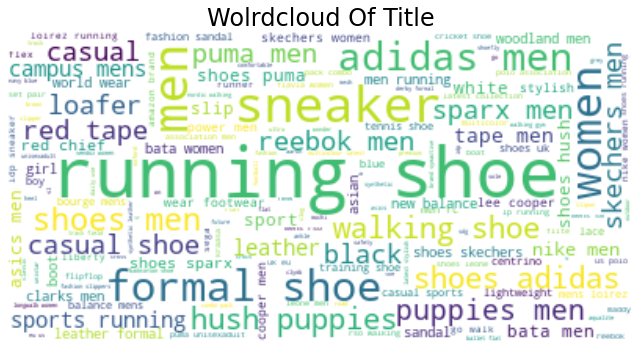

In [251]:
#create stopword list
stopwords = set(STOPWORDS)
#stopwords.update(['br','href'])
text = " ".join(word for word in sd1['title'])
wordcloud = WordCloud(background_color='white',stopwords=stopwords).generate(text)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wolrdcloud Of Title',size = 24)
plt.savefig('Worldcloud Of Title.jpg')
plt.show()

In [252]:
def get_top_n_words(corpus, n=None):
    vec=CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(sd1['title'], 20)
title = pd.DataFrame(common_words, columns = ['title', 'count'])
title.head()

,title,count
0,mens,598
1,shoes,591
2,running,417
3,shoe,203
4,men,192


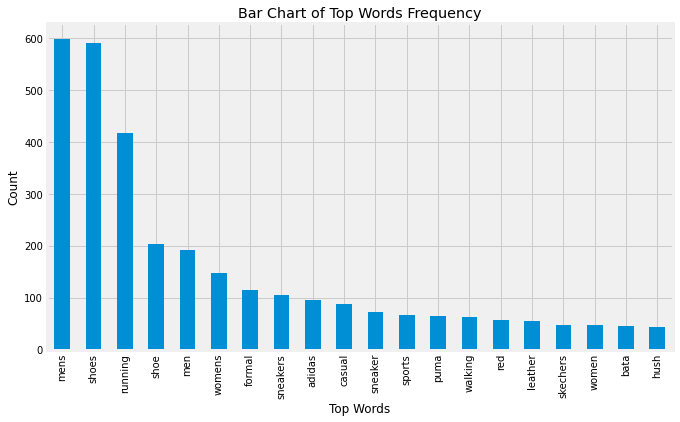

In [253]:
title.groupby('title').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Top Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency"
)
plt.savefig('World Title.jpg')
plt.show()

##total reviews >< category

Which product category have higher reviews ?

In [254]:
sd1.sample(2)

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type,category
97,woodstyle mens boys synthetic leather office u...,449.0,3.7,44,simple minimal design combining comfort fallin...,Only good|| Not so durable|| Bad cheap quality...,3.0 out of 5 stars|| 3.0 out of 5 stars|| 1.0 ...,men,formal shoes
518,crocs men literide mesh slip sneakers,2472.0,4.3,415,equal parts science magic new stretch mesh upp...,Superb|| Size is very small|| Goid|| Very good...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,men,casual shoes


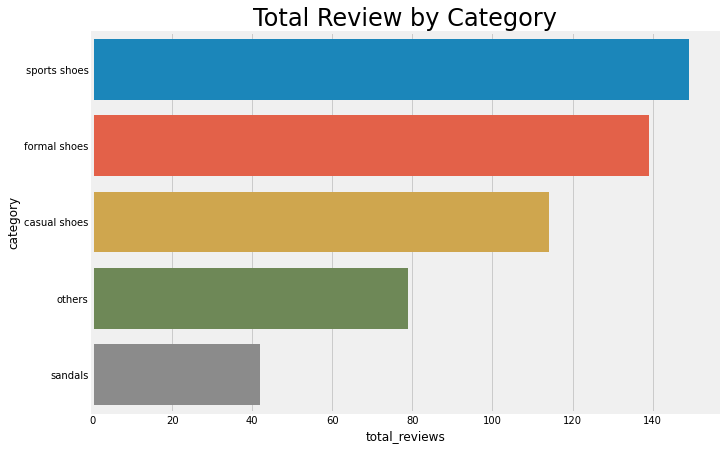

In [255]:
df_plot1 = sd1.groupby("category").agg({"total_reviews":"median"}).sort_values("total_reviews",ascending = False).reset_index()
plt.figure(figsize=(10,7))
sns.barplot(data=df_plot1,y="category",x="total_reviews")
plt.title('Total Review by Category',size = 24)
plt.savefig('Total Review by Category.jpg')
plt.show()

Sport shoes as the most total reviews

##category >< revenue
which product give most revenue ?

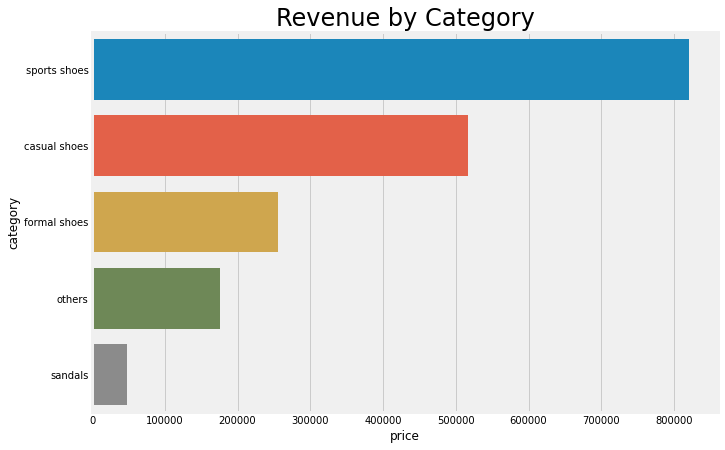

In [256]:
df_plot3 = sd1.groupby("category").agg({"price":"sum"}).sort_values("price",ascending = False).reset_index()
plt.figure(figsize=(10,7))
sns.barplot(data=df_plot3,y="category",x="price")
plt.title('Revenue by Category',size = 24)
plt.savefig('Revenue by Category.jpg')
plt.show()

## Shoe Type

In [257]:
sd1['Shoe Type'].value_counts()

men      806
women    209
Name: Shoe Type, dtype: int64

In [258]:
sd1.sample(2)

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type,category
578,woodland mens boots,2397.0,3.9,366,...,don't buy these shoes|| Woodland is the best||...,1.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,men,formal shoes
570,hush puppies mens chic trim crust loafers,3149.0,4.0,198,avail exciting edgy collection sport shoes for...,Damaged products at discounted price!|| Leathe...,1.0 out of 5 stars|| 1.0 out of 5 stars|| 4.0 ...,men,casual shoes


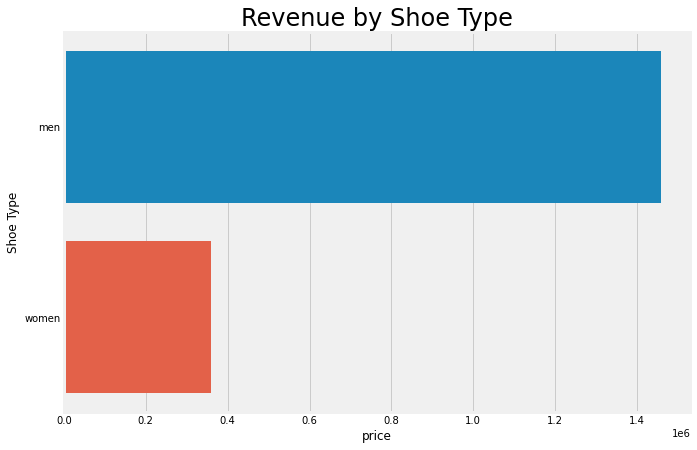

In [259]:
df_plot4 = sd1.groupby("Shoe Type").agg({"price":"sum"}).sort_values("price",ascending = False).reset_index()
plt.figure(figsize=(10,7))
sns.barplot(data=df_plot4,y="Shoe Type",x="price")
plt.title('Revenue by Shoe Type',size = 24)
plt.savefig('Revenue by Shoe Type.jpg')
plt.show()

## Product Description

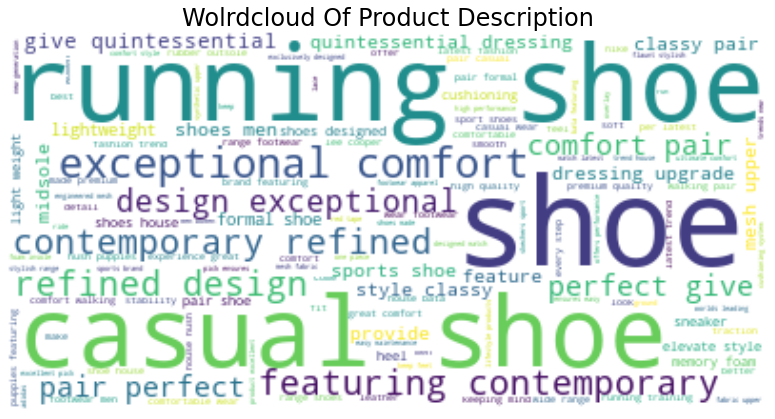

In [260]:
#create stopword list
stopwords = set(STOPWORDS)
#stopwords.update(['br','href'])
text = " ".join(word for word in sd1['product_description'])
wordcloud = WordCloud(background_color='white',stopwords=stopwords).generate(text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wolrdcloud Of Product Description',size = 24)
plt.savefig('Worldcloud Of Product Description.jpg', dpi=200)
plt.show()

#7 Sentiment Analysis

## Make new data frame

In [261]:
#return sd1 frame after cleaning
sd1.sample(5)

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type,category
2,trock mens sneaker,430.0,3.3,1251,flaunt stylish unique red casual shoes per lat...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,men,casual shoes
141,sparx mens running shoes,608.0,4.1,1135,sparx spectacular range footwear house relaxo ...,Satisfied with product..!|| orignal product 👍|...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 3.0 ...,men,sports shoes
770,mizuno mens wave rider running shoes,3169.0,3.8,173,next generation wave rider line mizunos best y...,Good competition to Asics ...|| My father in l...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,men,sports shoes
819,catwalk womens blue fashion sandals,598.0,3.7,20,catwalks comfy coma back fashion basics comfor...,Very happy to buy this.|| Bad,5.0 out of 5 stars|| 1.0 out of 5 stars,women,sandals
529,puma mens anzarun road running shoe,2099.0,4.1,292,product storythe next generation trainer upon ...,Super puma brand|| Worth every penny|| Excelle...,4.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,men,sports shoes


In [262]:
#dimension of data
sd1.shape

(1015, 9)

In [263]:
#make new data set for sentiment analysis
df = sd1[['reviews','reviews_rating']]
df.head()

,reviews,reviews_rating
0,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...
1,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...
2,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...
3,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...
4,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...


if we can see each raw contain several observation and interconnected ech other. then we will split and re-store as new dataframe 

In [264]:
#split each value that have been combined on df
review = []
rating = []

for j in df.index:
  lst = [i for i in df.iloc[j].reviews.split('||')]
  for k in lst:
    review.append(k)
  
for j in df.index:
  lst = [i for i in df.iloc[j].reviews_rating.split('||')]
  for k in lst:
    rating.append(k)

df2 = pd.DataFrame(list(zip(review,rating)),columns=['review','review_rating'])

df2.head()

,review,review_rating
0,Not happy with product,1.0 out of 5 stars
1,It's not as expected.,1.0 out of 5 stars
2,AVERAGE PRODUCT,3.0 out of 5 stars
3,Pic more beautiful,3.0 out of 5 stars
4,Got damage product. But quality is average fo...,3.0 out of 5 stars


In [265]:
df2['review'][6]

' Worst product'

In [266]:
df2.shape

(8208, 2)

df2 as our current dataset for sentiment analysis

## Helper Function
Creating function helper for cleaning, to remove unnecessary value such as emoji, symbols, other value unnecessary and standarize lower case to have pythonic way for building model. this function will help for cleaning review and reviews_rating

In [267]:
import nltk
from nltk.corpus import stopwords

In [268]:
import re
#make it lower
def lower(text):
    return text.lower()

#cleaning from punctuation such as -, , or etc
def remove_punctuation(text):
    return text.translate(str.maketrans('','', punctuation))

#cleaning stopwords english
stop = stopwords.words('english')
stop = set(stop)
stop.remove('not')
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop])

#cleaning all words with digits and standalone digits
def remove_digits(text):
    return re.sub(r'\d+', '', text)

#cleaning emoji
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Removing all non-printable symbols like "ड", "ட"
def remove_non_printable(text):
    text = text.encode("ascii", "ignore")
    return text.decode()
        
# One function to clean it all
def clean_text(text):
    text = lower(text)
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    text = remove_digits(text)
    text = remove_emoji(text)
    text = remove_non_printable(text)
    return text

#taking only number
def ambil_angka(text):
  x = re.search(r'\d', text)
  return x[0]

In [269]:
df2['review_rating'] = df2['review_rating'].apply(ambil_angka)
df2['review_cln'] = df2['review'].apply(clean_text)

In [270]:
df2.sample(5)

,review,review_rating,review_cln
3812,Copy shoes selling,1,copy shoes selling
5613,Good looking,4,good looking
3613,Price is varying in six days,1,price varying six days
6470,Not fit sir,4,not fit sir
1716,Comfortable shoes in lower price,5,comfortable shoes lower price


In [271]:
df2['review_cln'][2234]

'supposed nice shoe'

In [272]:
df2['review'][2234]

' Supposed to be a nice shoe BUT...'

In [273]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8208 entries, 0 to 8207
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review         8208 non-null   object
 1   review_rating  8208 non-null   object
 2   review_cln     8208 non-null   object
dtypes: object(3)
memory usage: 192.5+ KB


## missing value

In [274]:
df2.sample(3)

,review,review_rating,review_cln
6372,Price dropped.,3,price dropped
910,Good Product,4,good product
4069,Windsor black shoe,4,windsor black shoe


In [275]:
df2.isnull().sum()

review           0
review_rating    0
review_cln       0
dtype: int64

In [276]:
for column in df2.columns:
    print(f"============= {column} =================")
    display(df2[column].value_counts().head(20))
    print()

============= review =================


 Verified Purchase    399
 Good                 223
 Report abuse         185
 Good product         101
 Nice                  82
 Value for money       60
 Nice product          47
 Awesome               45
 Excellent             35
 Very good             32
 Comfortable           32
Verified Purchase      30
 Poor quality          29
 Nice shoes            28
 Good quality          25
 Good one              24
 Not good              24
 Quality               22
 Superb                21
 Perfect               21
Name: review, dtype: int64


============= review_rating =================


5    3902
4    1571
1    1532
3     722
2     481
Name: review_rating, dtype: int64


============= review_cln =================


verified purchase    429
good                 326
report abuse         199
good product         174
nice                 134
value money          110
nice product          83
comfortable           72
awesome               68
                      64
nice shoes            50
excellent             49
poor quality          47
good quality          39
not good              38
ok                    37
perfect               37
good one              35
go                    35
good shoes            31
Name: review_cln, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


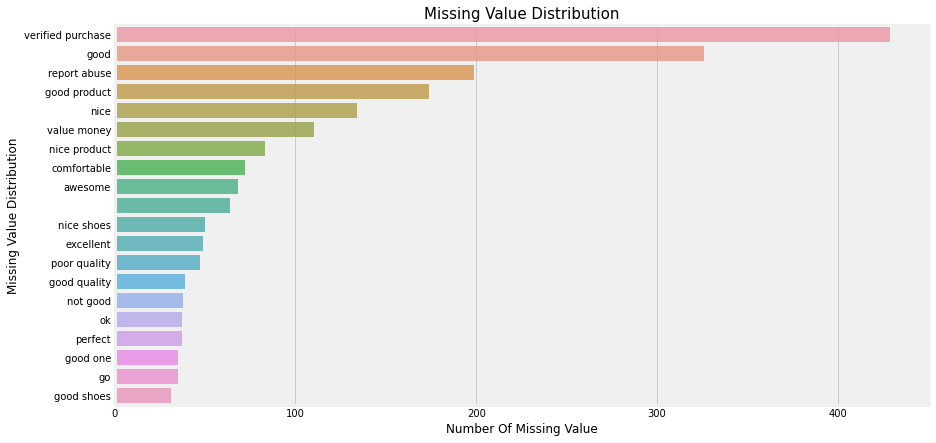

<Figure size 432x288 with 0 Axes>

In [277]:
review_cln = df2["review_cln"].value_counts()
review_cln = review_cln[:20,]
plt.figure(figsize=(13,7))
sns.barplot(review_cln.values, review_cln.index, alpha=0.8)
plt.title('Missing Value Distribution',size = 15)
plt.ylabel('Missing Value Distribution', fontsize=12)
plt.xlabel('Number Of Missing Value', fontsize=12)
plt.show()
plt.savefig('Missing Value Distribution.jpg')

We can observe :
1. we find "verified purchase", "report abuse", and "", seem to be some automatic texts 
2. we also find '', seems to be cleaning process

since we will focus for colums with have comment clearly from customer. So we will drop them

In [278]:
df2 = df2.replace({'review_cln': {'verified purchase': np.nan, 'report abuse': np.nan, '':np.nan}})

In [279]:
df2.dropna(inplace=True)

In [280]:
df3 = df2.reset_index()

In [281]:
df3.drop(columns='index', inplace=True)

In [282]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7516 entries, 0 to 7515
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review         7516 non-null   object
 1   review_rating  7516 non-null   object
 2   review_cln     7516 non-null   object
dtypes: object(3)
memory usage: 176.3+ KB


## Define column sentiment
Classifying reviews into “positive” and “negative” based on review rating . We will classify :
1. reviews rating 1-2 will be labeled negative
2. reviews rating will be score 4-5 will be labeled positive
3. while review rating 3 will be dropped since they are neutral. Our model will only classify positive and negative reviews..

so we can use this as training data for our sentiment classification model. 

In [283]:
#change data type review ratin first so we can define sentiment
df3 = df3.astype({'review_rating':'int64'})

In [284]:
#drop review rating = 3 and storing as df3
df3=df3[df3.review_rating != 3]

In [285]:
#function to define column sentiment
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "positive"
    elif (rating == 2) or (rating == 1):
        return "negative"

df3["sentiment"] = df3["review_rating"].apply(sentiments)

In [286]:
df3.sample(5)

,review,review_rating,review_cln,sentiment
1761,Worst product,1,worst product,negative
3479,Good,4,good,positive
6285,Good look..fits well,5,good lookfits well,positive
2147,Good,5,good,positive
1865,Amazing quality,5,amazing quality,positive


In [287]:
#dimension our dataset
df3.shape

(6842, 4)

In [288]:
df3['sentiment'].value_counts()

positive    4924
negative    1918
Name: sentiment, dtype: int64

In [289]:
df3['review_rating'].value_counts()

5    3464
1    1466
4    1460
2     452
Name: review_rating, dtype: int64

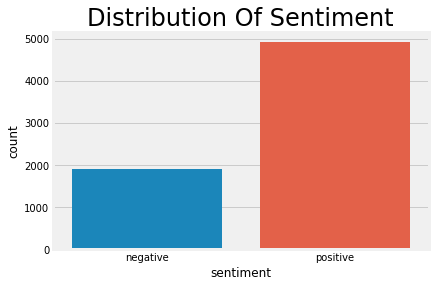

<Figure size 432x288 with 0 Axes>

In [290]:
#plt.figure(figsize=(10, 7))
sns.countplot(x=df3["sentiment"])
plt.title('Distribution Of Sentiment',size = 24)
plt.show()
plt.savefig('Distribution Of Sentiment.jpg')

We can see above table and chart

1. Almost 4924 cases belong to positive, while 1918 cases belong to negative. This is a really critical to bussiness for negative sentiment because it is an expression of customer after purhased goods

2. Beside that it is a showing imbalance between negative and positive. it will be noticed when working by spliting dataset (train and test) on building model.

## Exploratoray Data Analysis for Sentiment

###What is the characteristics customer review by ratings ?

In [291]:
df3['review_len'] = df3['review_cln'].astype(str).apply(len)

In [292]:
df3.sample(2)

,review,review_rating,review_cln,sentiment,review_len
5497,Bad product,1,bad product,negative,11
202,Its not long lasting,1,not long lasting,negative,16


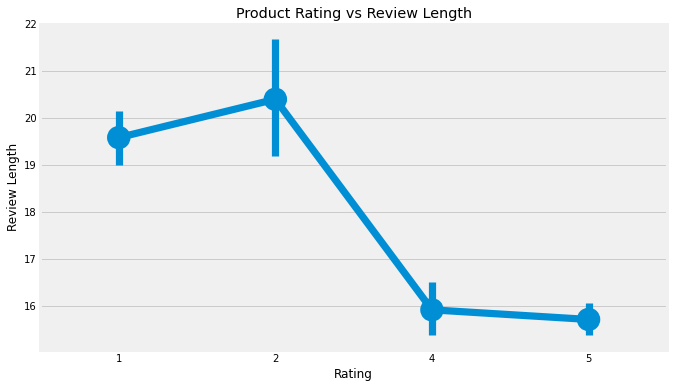

In [293]:
plt.figure(figsize=(10, 6))
sns.pointplot(x = "review_rating", y = "review_len", data = df3)
plt.xlabel("Rating")
plt.ylabel("Review Length")
plt.title("Product Rating vs Review Length")
plt.show()

- When rating between 1 and 2 (as negative), review length significanty goes up, especially for rating 2 as top level meaning when customer were not happy, they spent more their expression by giving more comment.
- When the rating is between 4 and 5 stars (as sentiment positive), with 5 stars as the shortest, review length significantly goes down, meaning Reviews with 4-5 stars are not very wordy. So, when customers were happy, they didn’t write too much! 

###What is the top words characteristics reviews for postive ?

In [294]:
df3.sample(3)

,review,review_rating,review_cln,sentiment,review_len
2153,Go for it,5,go,positive,2
2702,It is duplicate and also thick quality,1,duplicate also thick quality,negative,28
1777,Superb n comfortable pairs ...,5,superb n comfortable pairs,positive,26


In [295]:
positif = df3[df3['sentiment'] == 'positive']
positif.sample(2)

,review,review_rating,review_cln,sentiment,review_len
7356,Perfect summer shoes for walking,5,perfect summer shoes walking,positive,28
7515,Asics shoes are the best,5,asics shoes best,positive,16


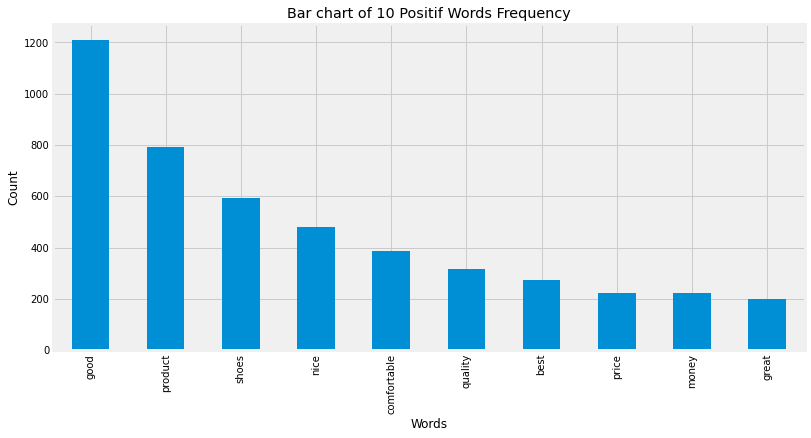

In [296]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(1,1)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words2 = get_top_n_bigram(positif['review_cln'], 10)
onepost = pd.DataFrame(common_words2, columns=['review', "count"])
onepost.groupby('review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Words",
    ylabel = "Count",
    title = "Bar chart of 10 Positif Words Frequency")

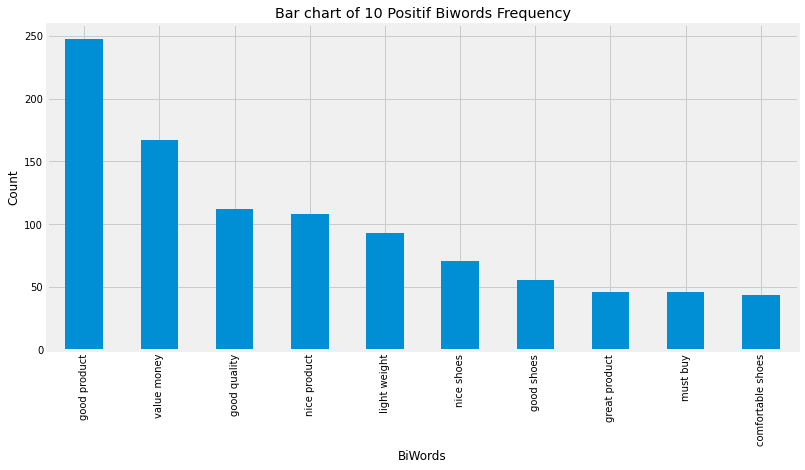

In [297]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words2 = get_top_n_bigram(positif['review_cln'], 10)
tripost = pd.DataFrame(common_words2, columns=['review', "count"])
tripost.groupby('review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "BiWords",
    ylabel = "Count",
    title = "Bar chart of 10 Positif Biwords Frequency")

I take insight from biwords since i feel need to know a word after whether explain expression about product or service. Based on above, We can observe :
- Good product as the most frequent biwords to show customer satisfied from positive sentiment
- Expression positive which good, nice, great and comfortable is always followed a noun that product, money, shoes or quality, meaning customer write their review more spend about product not service of seller. 

###What is the top triwords characteristics reviews for negative ?

In [298]:
negatif = df3[df3['sentiment'] == 'negative']
negatif.sample(2)

,review,review_rating,review_cln,sentiment,review_len
6394,Skip these ones...!!!,2,skip ones,negative,9
4456,Did not expect such a poor quality shoe from ...,1,not expect poor quality shoe hush puppies,negative,41


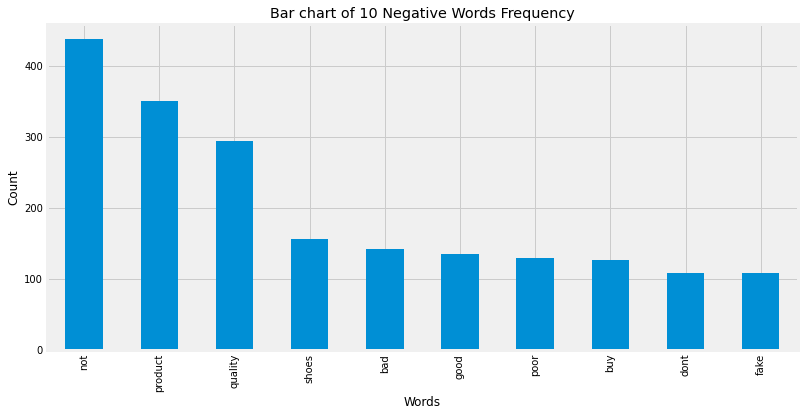

In [299]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(1,1)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words2 = get_top_n_bigram(negatif['review_cln'], 10)
oneneg = pd.DataFrame(common_words2, columns=['review', "count"])
oneneg.groupby('review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Words",
    ylabel = "Count",
    title = "Bar chart of 10 Negative Words Frequency")

In [300]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3,3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words3 = get_top_n_bigram(negatif['review_cln'], 10)
triwords = pd.DataFrame(common_words3, columns=['review', "count"])
triwords.sample(5)

,review,count
7,not good quality,6
4,quality not good,8
5,not good product,6
2,poor quality product,9
0,product dont buy,11


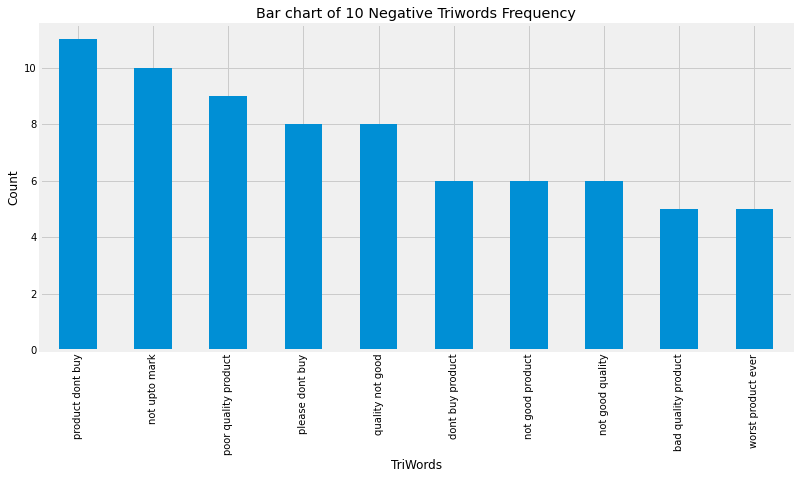

In [301]:
triwords.groupby('review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "TriWords",
    ylabel = "Count",
    title = "Bar chart of 10 Negative Triwords Frequency")

##Spliting Data into train and test data
since The number of data classes to be labeled is not balanced (read by Distribution Of Sentiment), so the data imbalance is handled by using resampling. The sample taken is 1900 data on each label

In [302]:
df3.sample(2)

,review,review_rating,review_cln,sentiment,review_len
5259,AMAZING go for it. VFM,5,amazing go vfm,positive,14
3713,Not comfortable,1,not comfortable,negative,15


In [303]:
#resampling dataframe based on distribution sentiment
sample_0 = df3[df3['sentiment']=='negative'].sample(1900, replace=True)
sample_1 = df3[df3['sentiment']=='positive'].sample(1900, replace=True)
df4 = pd.concat([sample_0,sample_1])

In [304]:
df4.sample(2)

,review,review_rating,review_cln,sentiment,review_len
243,Must buy,5,must buy,positive,8
5331,Super,5,super,positive,5


In [305]:
df4["sentiment"].value_counts()

negative    1900
positive    1900
Name: sentiment, dtype: int64

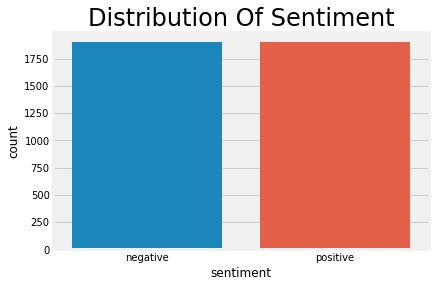

<Figure size 432x288 with 0 Axes>

In [306]:
#plt.figure(figsize=(10, 7))
sns.countplot(x=df4["sentiment"])
plt.title('Distribution Of Sentiment',size = 24)
plt.show()
plt.savefig('Distribution Of Sentiment.jpg')

In [307]:
df4.shape

(3800, 5)

In [308]:
#then spliting data : 80% train and 20%test
from sklearn.model_selection import train_test_split
Y=df4['sentiment']
Y = Y.map({'positive': 1, 'negative': 0}).astype(int)
X=df4['review_cln']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

## Model

In [309]:
#For the vctorization, we use the TF-IDF method
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [314]:
#For the vctorization, we use the TF-IDF method
from sklearn.feature_extraction.text import TfidfTransformer

vectorizer = TfidfTransformer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [188]:
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, accuracy_score
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(X_train, Y_train)
prediction_linear = classifier_linear.predict(X_test)

In [189]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


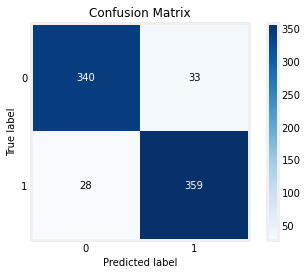

In [190]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(Y_test,prediction_linear)


In [191]:
confusion_matrix(Y_test,prediction_linear)

array([[340,  33],
       [ 28, 359]])

In [192]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, accuracy_score
#Show the classification report
print('f1-score  : {}'.format(round(f1_score(Y_test,prediction_linear)*100,2)))
print('')
print('Accuracy score  : {}'.format(round(accuracy_score(Y_test,prediction_linear)*100,2)))
print('')
print('Precission score  : {}'.format(round(precision_score(Y_test,prediction_linear)*100,2)))
print('')
print('Recall score hasil  : {}'.format(round(recall_score(Y_test,prediction_linear)*100,2)))

f1-score  : 92.17

Accuracy score  : 91.97

Precission score  : 91.58

Recall score hasil  : 92.76


##Test Classification Model 

In [193]:
df3.sample(5)

,review,review_rating,review_cln,sentiment,review_len
4926,Tough shoes on outside,4,tough shoes outside,positive,19
5116,Durable good looking and comfortable shoes,5,durable good looking comfortable shoes,positive,38
3781,Nice product,4,nice product,positive,12
1159,Light weight shoes love this product,5,light weight shoes love product,positive,31
164,Extra Low quality shoes,1,extra low quality shoes,negative,23


In [194]:
df3['review'][754]

' It is the worst product I have ever bought from Amazon.'